In [71]:
import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.datasets import load_breast_cancer

from numpy.random import seed
from tensorflow import set_random_seed

In [72]:
x,y = load_breast_cancer(return_X_y = True)
x = preprocessing.MinMaxScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle = True, random_state=0)
n_features = x.shape[1]

In [103]:
from keras import optimizers

seed(0)
set_random_seed(0)

# defining the model
model = Sequential()
model.add(Dense(5, input_dim = n_features, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
#model.add(Dense(3, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(1, activation='sigmoid',kernel_initializer='random_uniform', bias_initializer='zeros'))

# compile the model
#opt = optimizers.SGD(lr=0.05)
#opt = optimizers.SGD(lr=0.01, momentum=0.9)
opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['acc'])

# fit the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32,validation_data =(x_test,y_test), verbose=0)

In [104]:
loss, acc = model.evaluate(x_test, y_test)
print('Accuracy on test dataset: %.2f' % acc)
print('Loss: ', loss)

188/188 [==============================] - 0s 83us/step
Accuracy on test dataset: 0.96
Loss:  0.1367706684990132


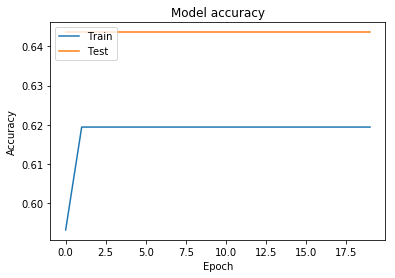

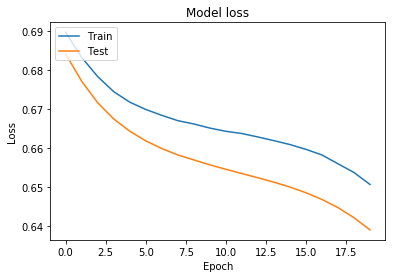

In [100]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
pred = model.predict(x_test)

for i in range(5):
    print(pred[i])

[0.6238395]
[0.6312653]
[0.6321076]
[0.6312491]
[0.6332286]
